# Homework 9: Programming Exercises




Before you get started you might want to run the following cell (and potentially add your own import lines to it later on):

In [23]:
import random
from collections import Counter
import numpy as np
from numpy.random import randint
import matplotlib.pyplot as plt

## Exercise 1
Each day, around midday, a long line forms at the Warren Tower Subway. People line up to get their favorite lunch options. The time (in minutes) it takes to make and sell a sub depends on the type of order, and we model it as a real number chosen uniformly and independently at random from the interval [0,15]. For simplicity, we will assume that only one order is processed at a time, and that each order is placed in the exact moment in which the previous sub is ready. 

Let $X$ be the random variable equal to the number of people that place an order in 15 minutes.

<b>Example:</b> If the first person's sub takes 4.3 minutes to make, the second person's sub takes 7.7 minutes, and the third person's sub takes 4.475 minutes, then $X = 3$ (even if the third person's sub is not done in the 15 minute window).

Write a function that empirically estimates $\mathrm{Ex}(X)$. Use a sufficiently large number of trials (e.g., 10000) and have your function return the estimated value.

In [24]:
# Your solution here
def estimate_expected_orders(num_trials=10000):
    est_val = 0
    trial = []
    
    for x in range(num_trials):
        i = 1
        total_time = 0
        expected_time = 0
        while total_time <= 15:
            time_spent = random.uniform(0,15)
            expected_time += x * (time_spent) / 15
            i += 1
            total_time += time_spent
        trial.append(expected_time)
    
    for y in range(len(trial)):
        est_val += trial[y]
        
        est_val = est_val / len(trial)
    return est_val

print(estimate_expected_orders())

1.845267059269621


## Exercise 2

You invest in a stock originally worth $\$ 1000$. The value of the stock goes up or down by exactly $\$ 1$ each day with equal probability. Let $S_i$ be the value of the stock on day $i$. We track the value of the stock for a year (365 days). Note that at the end of the year, the value $S_{365}$ is some integer number between 1365 and 1000 - 365 = 635.

Let $P$ be the number of days $i$ in which $S_i > 1000$. Note that $P$ is some integer between 0 and 365.

<b>Think:</b> what do you think the distribution of $P$ looks like?

In this exercise we will answer this question via simulation.

### Exercise 2(a)
Write a function that gives you the increment in stock value in a day.

In [25]:
# Your code here

def one_day_stock_increase():
    # returns +/- 1 with probability 1/2
    value = random.randint(1,2)
    if value == 1:
        return 1
    else:
        return -1

### Exercise 2(b)

Write a function that keeps track of the value $S_i$ of the stock every day for one year, and counts the number of days in which $S_i$ is positive.

In [30]:
# Your code here

def number_of_positive_days_in_year():
    # Simulates the stock value for a year by calling the above function 365 times 
    # and adding the new change each time.
    # Counts and returns the value of P, the number of days in which the stock value is above 1000.
    p = 0
    value = 1000
    for x in range(365):
        value += one_day_stock_increase()
        if value > 1000:
            p += 1
    return p
    
    
    
    
    
    
    
    
    
    
    

### Exercise 2(c)

Estimate the PDF of $P$ by running the above function multiple times and plotting the histogram of results. The code for plotting is provided for you below.

In [27]:
# helper function to plot the empirical distribution as a bar chart
# here we are only displaying a subset of the x-labels
#   since otherwise the x-labels would not be readable
def plot_results(results, title, num_labels = 10):
    summary = Counter(results)
    x = [i for i in range(min(results),max(results)+1) if summary[i] != 0]
    y = [summary[i]/ len(results) for i in x]
    
    # the xvalues are displayed at positions 0, 1, 2, ...
    plt.bar(np.arange(len(x)), y, align='center')
    
    # display a small number of x-labels
    xinc = (int) (len(x) / num_labels)
    xcoords = [i * xinc for i in range(num_labels) if i * xinc < len(x) - 1]
    xcoords.append(len(x) - 1) # also add the maximum value
    xlabels = [x[i] for i in xcoords]
    
    plt.xticks(xcoords, xlabels)
    plt.title(title)
    plt.show()

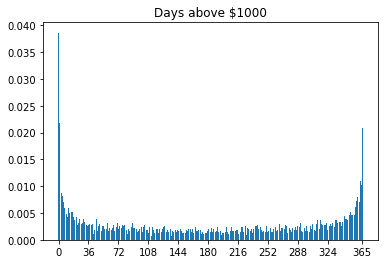

None


In [31]:
# Your code here

def estimate_P(num_trials=10000):
    # runs the above function num_trials times and plots the histogram of results
    results = []
    for x in range(num_trials):
        results.append(number_of_positive_days_in_year())
    return results

print(plot_results(estimate_P(), "Days above $1000"))

<b>Think:</b> Was this the result you expected?